# Generate cerebra_data
Notebook to generate cerebra_data folder (cerebra_atlas_python/cerebra_data)

**Requirements:**
- FreeSurfer (https://surfer.nmr.mgh.harvard.edu/)
- Datasets:
    - [CerebrA](https://gin.g-node.org/anamanera/CerebrA/src/master/): $CEREBRA_DIR
    - [ICBM 2009c Nonlinear Symmetric [NIFTI]](https://nist.mni.mcgill.ca/icbm-152-nonlinear-atlases-2009/): $ICBM_DIR
- Install requirements.txt

In [1]:
# Notebook setup
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
# Imports
import os
import os.path as op
import logging
import mne
import numpy as np
import nibabel as nib
from cerebra_atlas_python.mni_average import MNIAverage
from cerebra_atlas_python.utils import inspect_img,setup_logging
from cerebra_atlas_python.plotting import plot_brain_slice_2d, orthoview

In [3]:
## Constants

# Datasets
ICBM_DIR = op.join(os.getenv("DATASETS_DIR"),"ICBM_2009c_Nonlinear_Symmetric/mni_icbm152_nlin_sym_09c_nifti")
CEREBRA_DIR = op.join(os.getenv("DATASETS_DIR"),"Cerebra")

# FreeSurfer
FS_SUBJECTS_DIR = os.getenv("SUBJECTS_DIR")
NEW_SUBJECT_NAME = "icbm152" # Used by FreeSurfer
NEW_FS_SUBJECT_DIR = op.join(FS_SUBJECTS_DIR,NEW_SUBJECT_NAME)
BEM_DIR = op.join(NEW_FS_SUBJECT_DIR, "bem")

# Output dir
CEREBRA_DATA_DIR = "../cerebra_atlas_python/cerebra_data"
CEREBRA_DATA_FS_DIR = op.join(CEREBRA_DATA_DIR, "FreeSurfer")
CEREBRA_DATA_ICBM152_DIR = op.join(CEREBRA_DATA_FS_DIR, "subjects", NEW_SUBJECT_NAME)
CEREBRA_DATA_MNE_DIR = op.join(CEREBRA_DATA_DIR, "MNE")
# HEAD_MRI_T_PATH = op.join(CEREBRA_DATA_icbm152_DIR,"head_mri_t.fif")
# FIDUCIALS_PATH = op.join(CEREBRA_DATA_icbm152_DIR,"bem/icbm152-fiducials.fif")
CEREBRA_VOLUME_PATH = op.join(CEREBRA_DATA_DIR,"volume.npy")
CEREBRA_AFFINE_PATH = op.join(CEREBRA_DATA_DIR,"affine.npy")
LABEL_DETAILS_PATH = op.join(CEREBRA_DATA_DIR,"label_details.csv")
# INFO_PATH = op.join(CEREBRA_DATA_DIR,"info.fif")
# MRI_RAS_T_PATH = op.join(CEREBRA_DATA_DIR,"mri_ras-trans.fif")
# MONTAGE_KIND = "GSN-HydroCel-129" TODO: DELETE
# MONTAGE_HEAD_SIZE = 0.1025 TODO: DELETE

In [4]:
setup_logging("INFO")

 [INFO] 2024-04-11 19:44:41.548 utils - inspect_img: img.shape= (256, 256, 256)
 [INFO] 2024-04-11 19:44:41.548 utils - inspect_img: Coordinate frame: LIA
 [INFO] 2024-04-11 19:44:41.549 utils - inspect_img: 
[[  -1.     0.     0.   128.5]
 [   0.     0.     1.  -145.5]
 [   0.    -1.     0.   146.5]
 [   0.     0.     0.     1. ]]


ax.get_xlim()=(0.0, 256.0)
fixed_value= 128 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 146 cerebra_volume.shape= (256, 256, 256)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

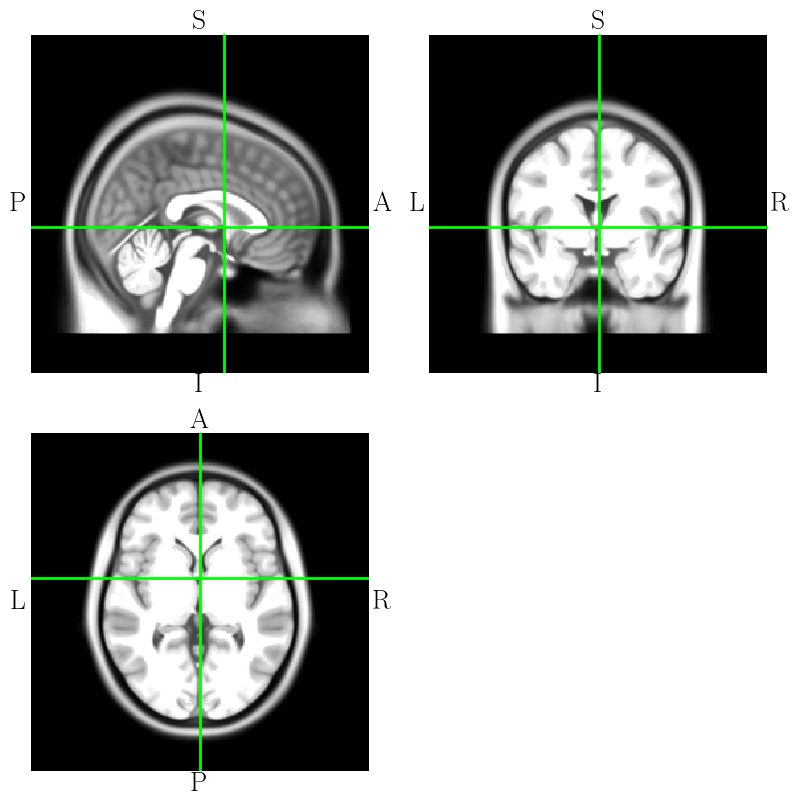

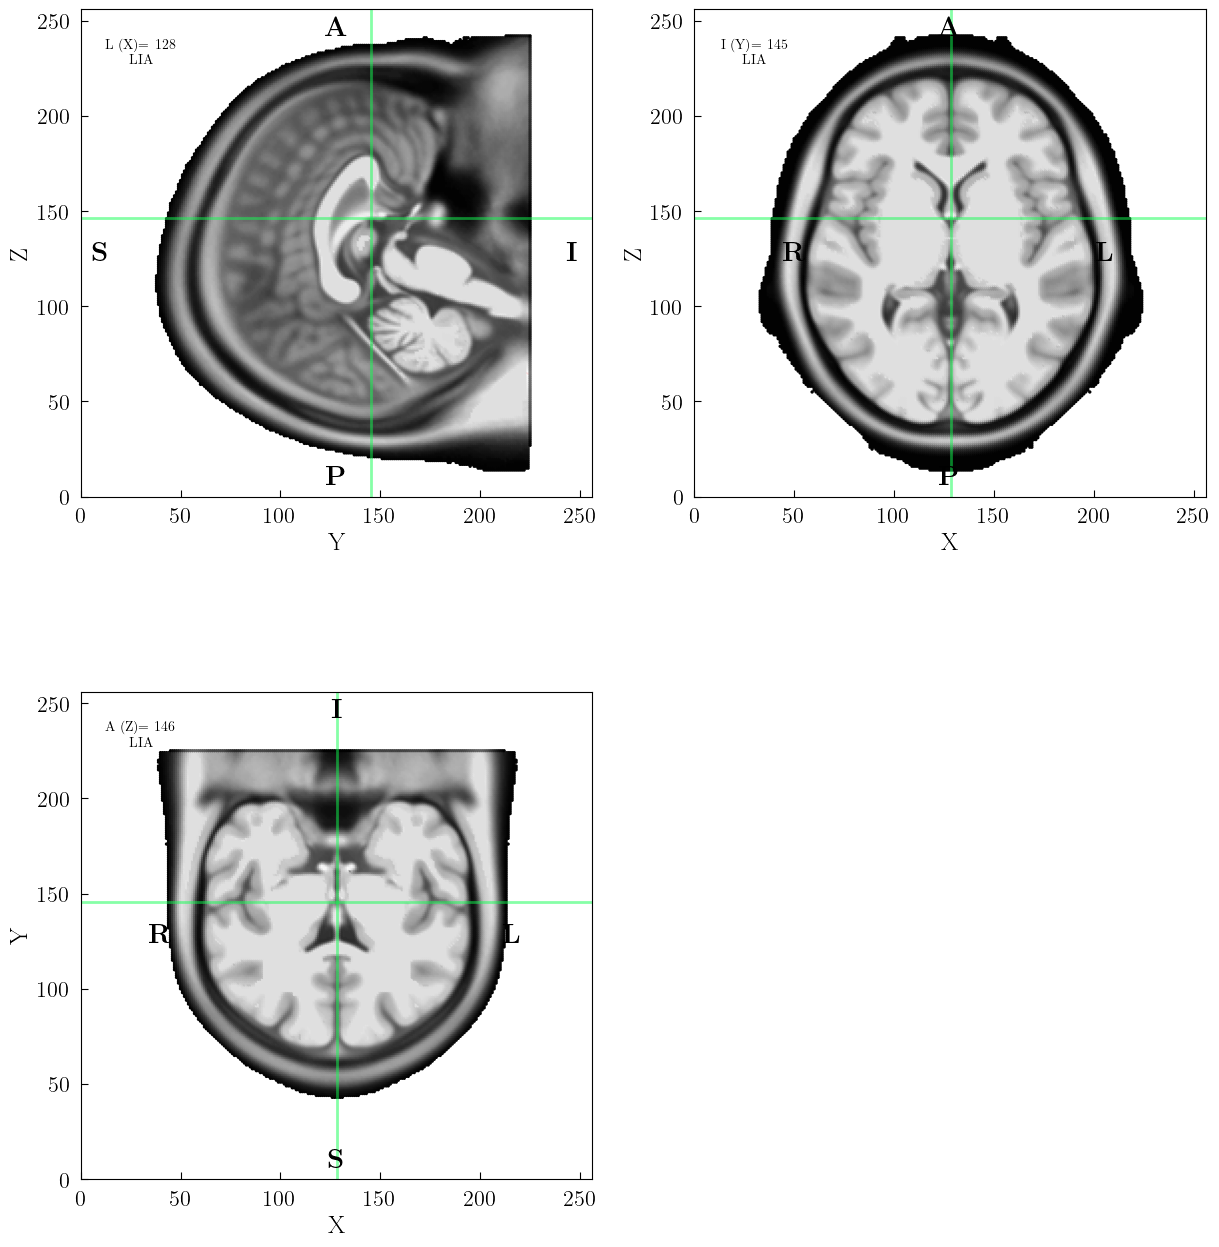

In [141]:
t1mgz = nib.load(f"{CEREBRA_DATA_ICBM152_DIR}/mri/T1.mgz")
inspect_img(f"{CEREBRA_DATA_ICBM152_DIR}/mri/T1.mgz")
orthoview(t1mgz.get_fdata(), t1mgz.affine, narrow_ax=False,plot_affine=True)

 [INFO] 2024-04-11 18:45:36.991 utils - inspect_img: img.shape= (256, 256, 256)
 [INFO] 2024-04-11 18:45:36.991 utils - inspect_img: Coordinate frame: LIA
 [INFO] 2024-04-11 18:45:36.992 utils - inspect_img: 
[[  -1.     0.     0.   128.5]
 [   0.     0.     1.  -145.5]
 [   0.    -1.     0.   146.5]
 [   0.     0.     0.     1. ]]


ax.get_xlim()=(0.0, 256.0)
fixed_value= 128 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 146 cerebra_volume.shape= (256, 256, 256)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

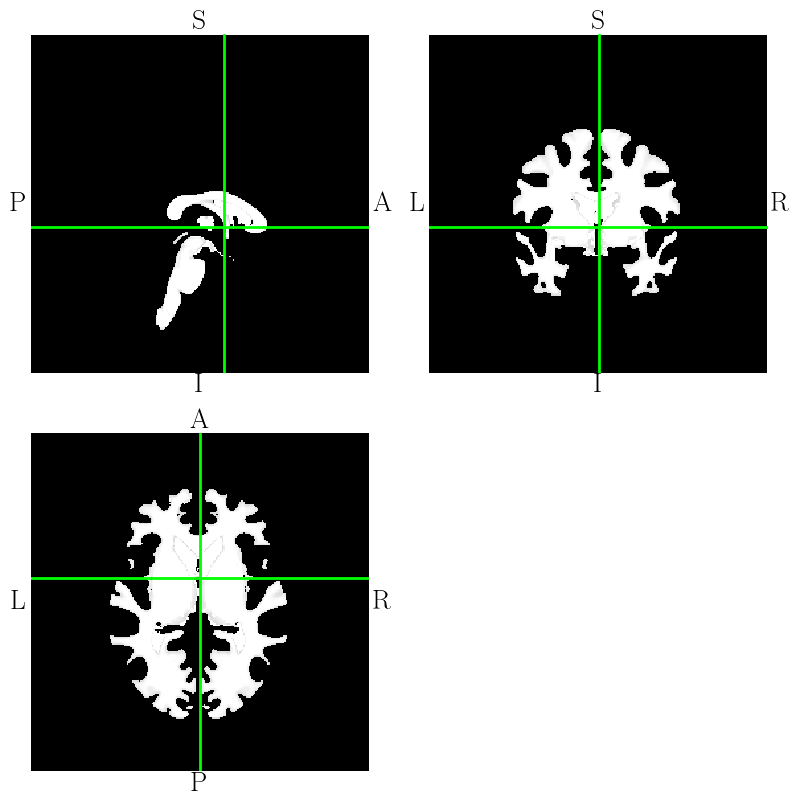

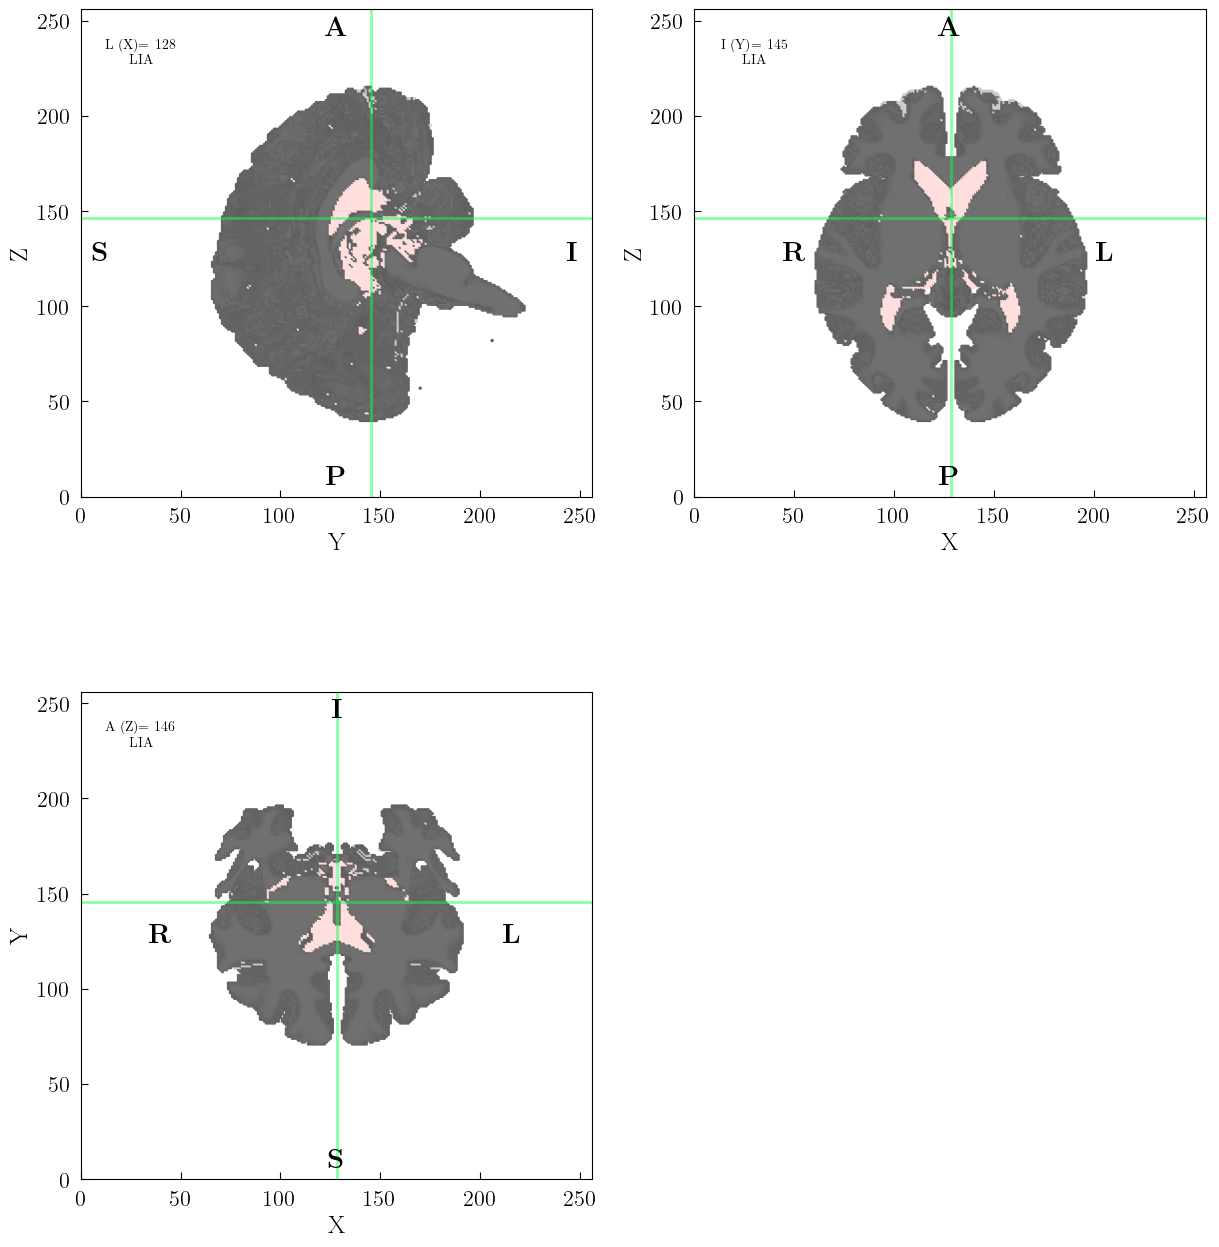

In [55]:
wmmgz = nib.load(f"{CEREBRA_DATA_ICBM152_DIR}/mri/wm.mgz")
inspect_img(f"{CEREBRA_DATA_ICBM152_DIR}/mri/wm.mgz")
orthoview(wmmgz.get_fdata(), wmmgz.affine, narrow_ax=False,plot_affine=True)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
 [INFO] 2024-04-11 18:46:39.329 batteryrunners - log_raise: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
 [INFO] 2024-04-11 18:46:39.331 batteryrunners - log_raise: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
 [INFO] 2024-04-11 18:46:39.480 utils - inspect_img: img.shape= (193, 229, 193)
 [INFO] 2024-04-11 18:46:39.480 utils - inspect_img: Coordinate frame: RAS
 [INFO] 2024-04-11 18:46:39.481 utils - inspect_img: 
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -132.]
 [   0.    0.    1.  -78.]
 [   0.    0.    0.    1.]]


ax.get_xlim()=(0.0, 229.0)
fixed_value= 96 cerebra_volume.shape= (193, 229, 193)
ax.get_xlim()=(0.0, 193.0)
fixed_value= 132 cerebra_volume.shape= (193, 229, 193)
ax.get_xlim()=(0.0, 193.0)
fixed_value= 78 cerebra_volume.shape= (193, 229, 193)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

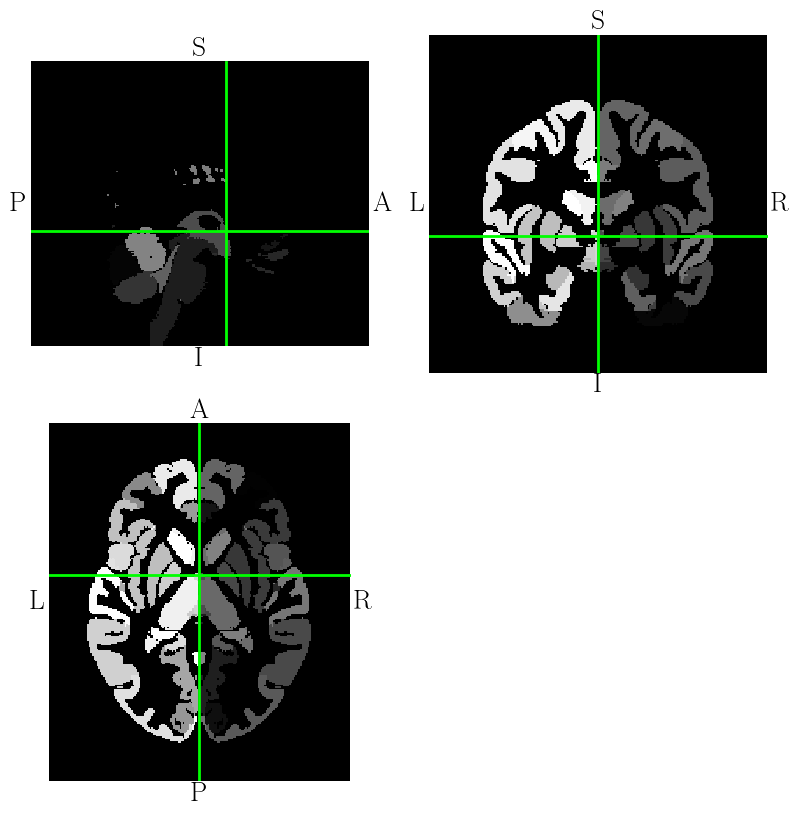

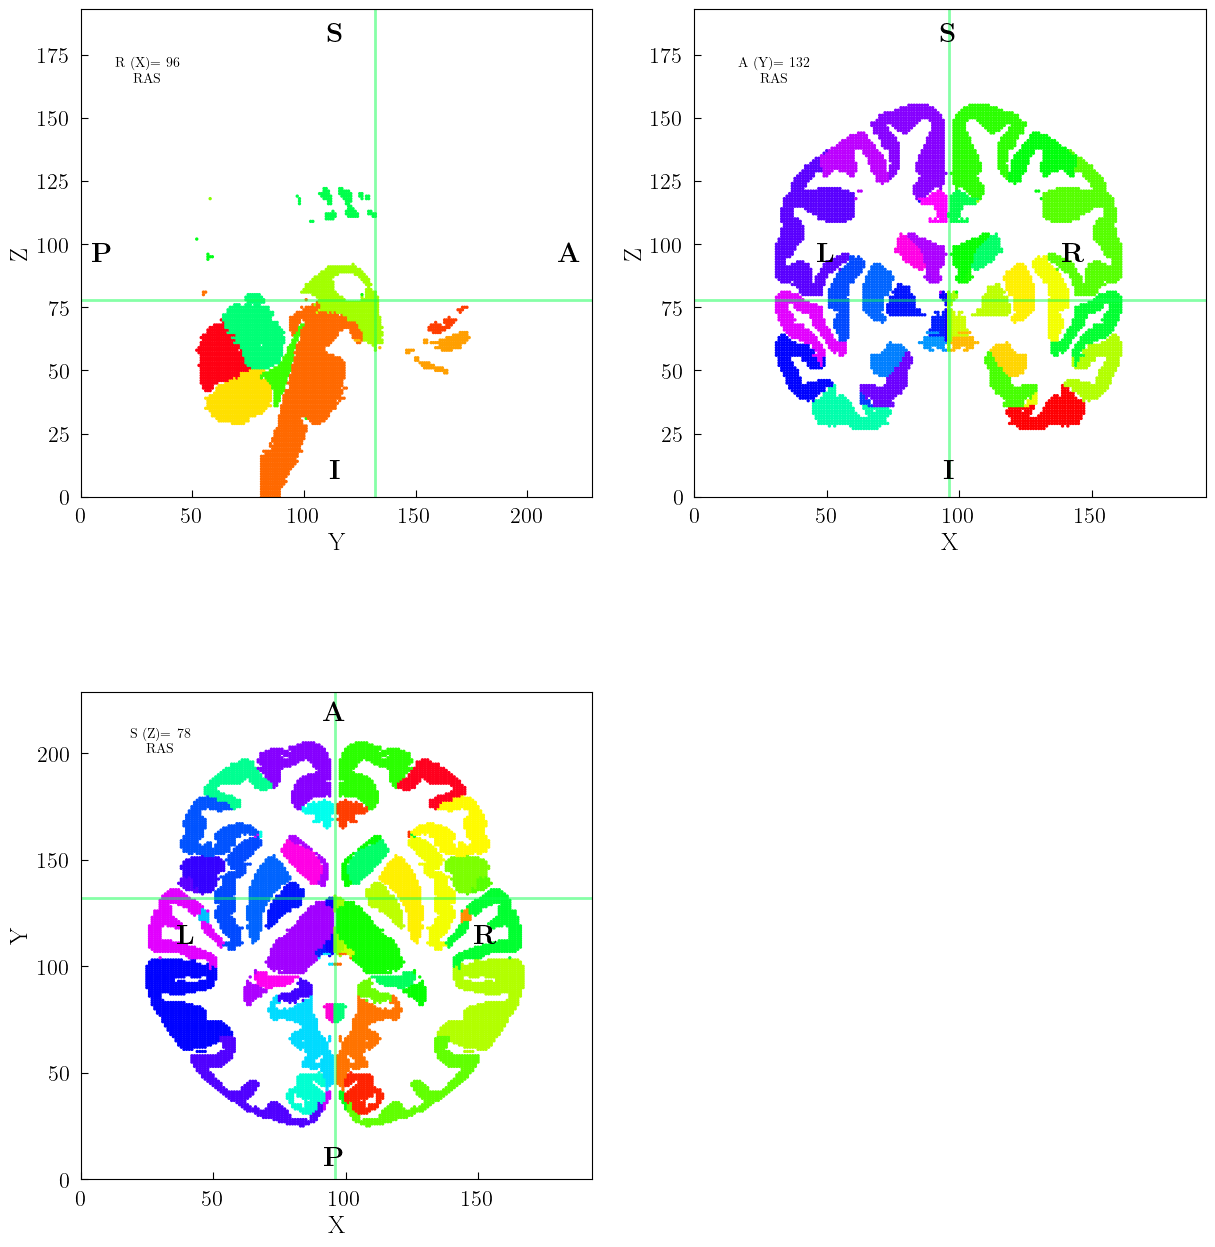

In [57]:
cerebranii = nib.load(f"{CEREBRA_DIR}/CerebrA.nii")
inspect_img(f"{CEREBRA_DIR}/CerebrA.nii")
orthoview(cerebranii.get_fdata(), cerebranii.affine, narrow_ax=False,plot_affine=True, n_layers=1)

 [INFO] 2024-04-11 18:47:10.413 utils - inspect_img: img.shape= (256, 256, 256)
 [INFO] 2024-04-11 18:47:10.414 utils - inspect_img: Coordinate frame: LIA
 [INFO] 2024-04-11 18:47:10.414 utils - inspect_img: 
[[  -1.     0.     0.   128.5]
 [   0.     0.     1.  -145.5]
 [   0.    -1.     0.   146.5]
 [   0.     0.     0.     1. ]]


ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

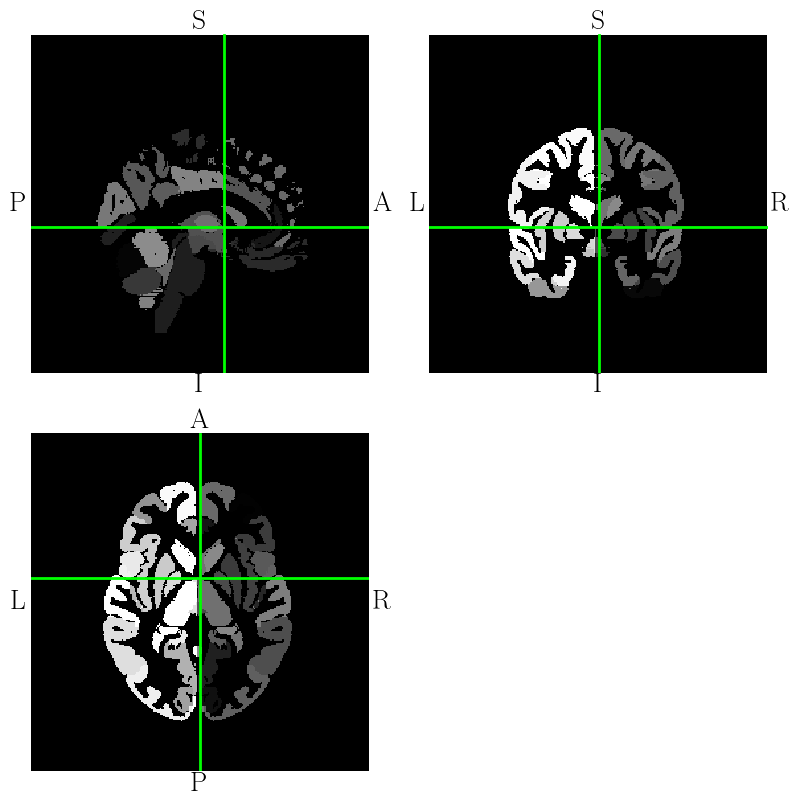

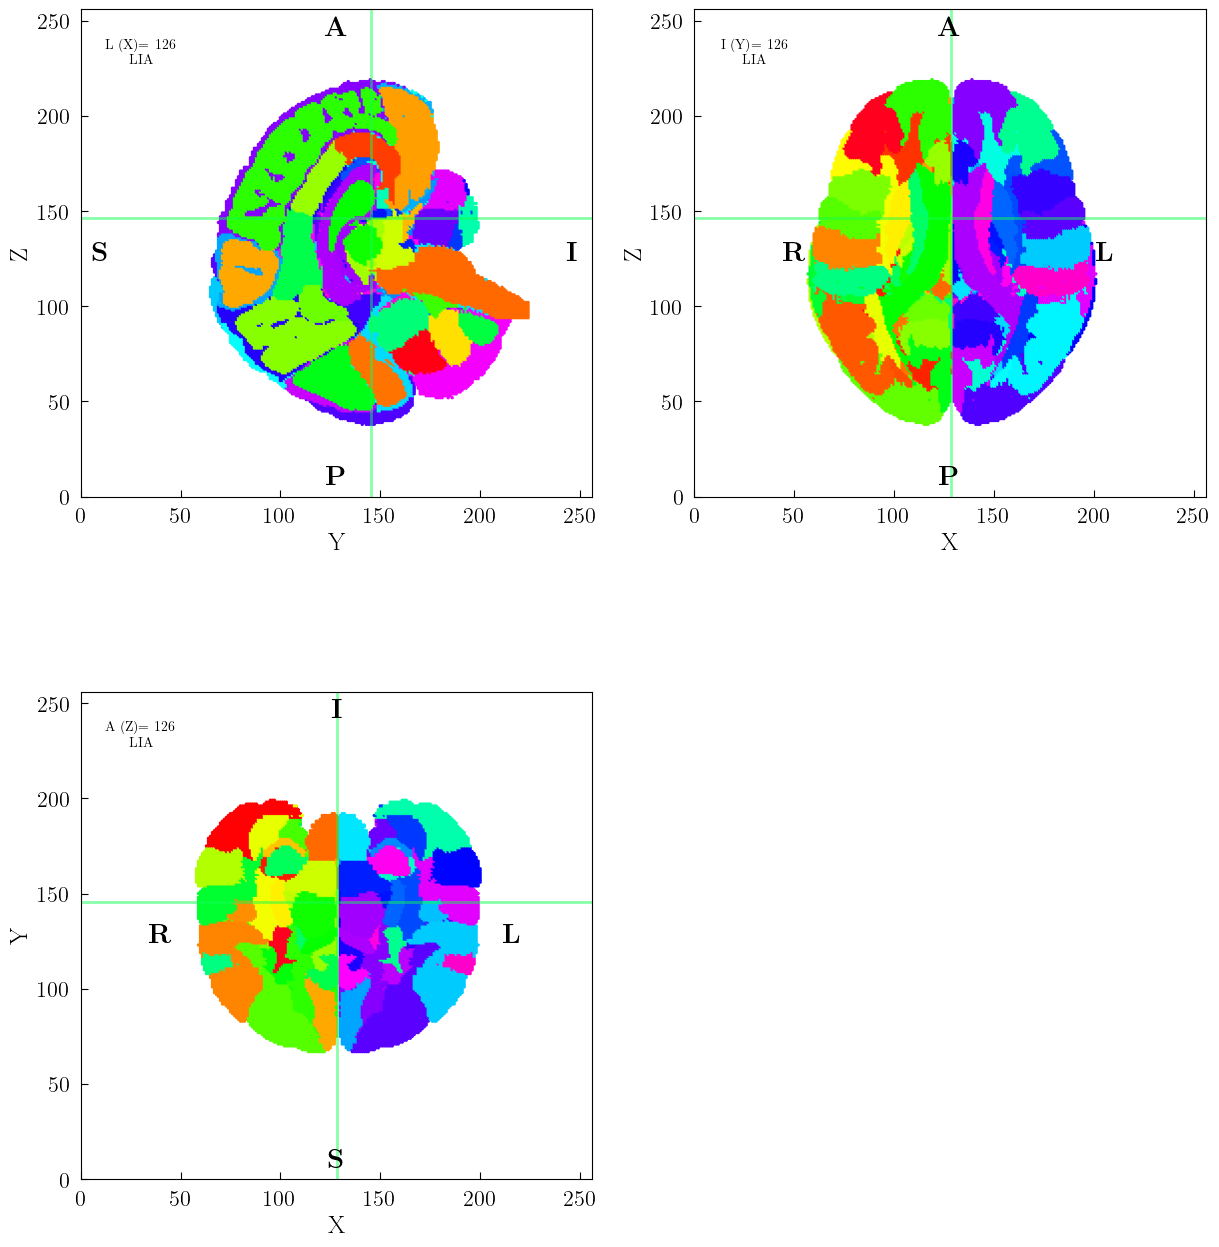

In [58]:
path = f"{CEREBRA_DIR}/CerebrA_in_head.mgz"
cerebra_in_head_mgz = nib.load(path)
inspect_img(path)
orthoview(cerebra_in_head_mgz.get_fdata(), cerebra_in_head_mgz.affine, narrow_ax=False,plot_affine=True,fixed_value=126)

ax.get_xlim()=(0.0, 256.0)
fixed_value= 128 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 146 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)


(None,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

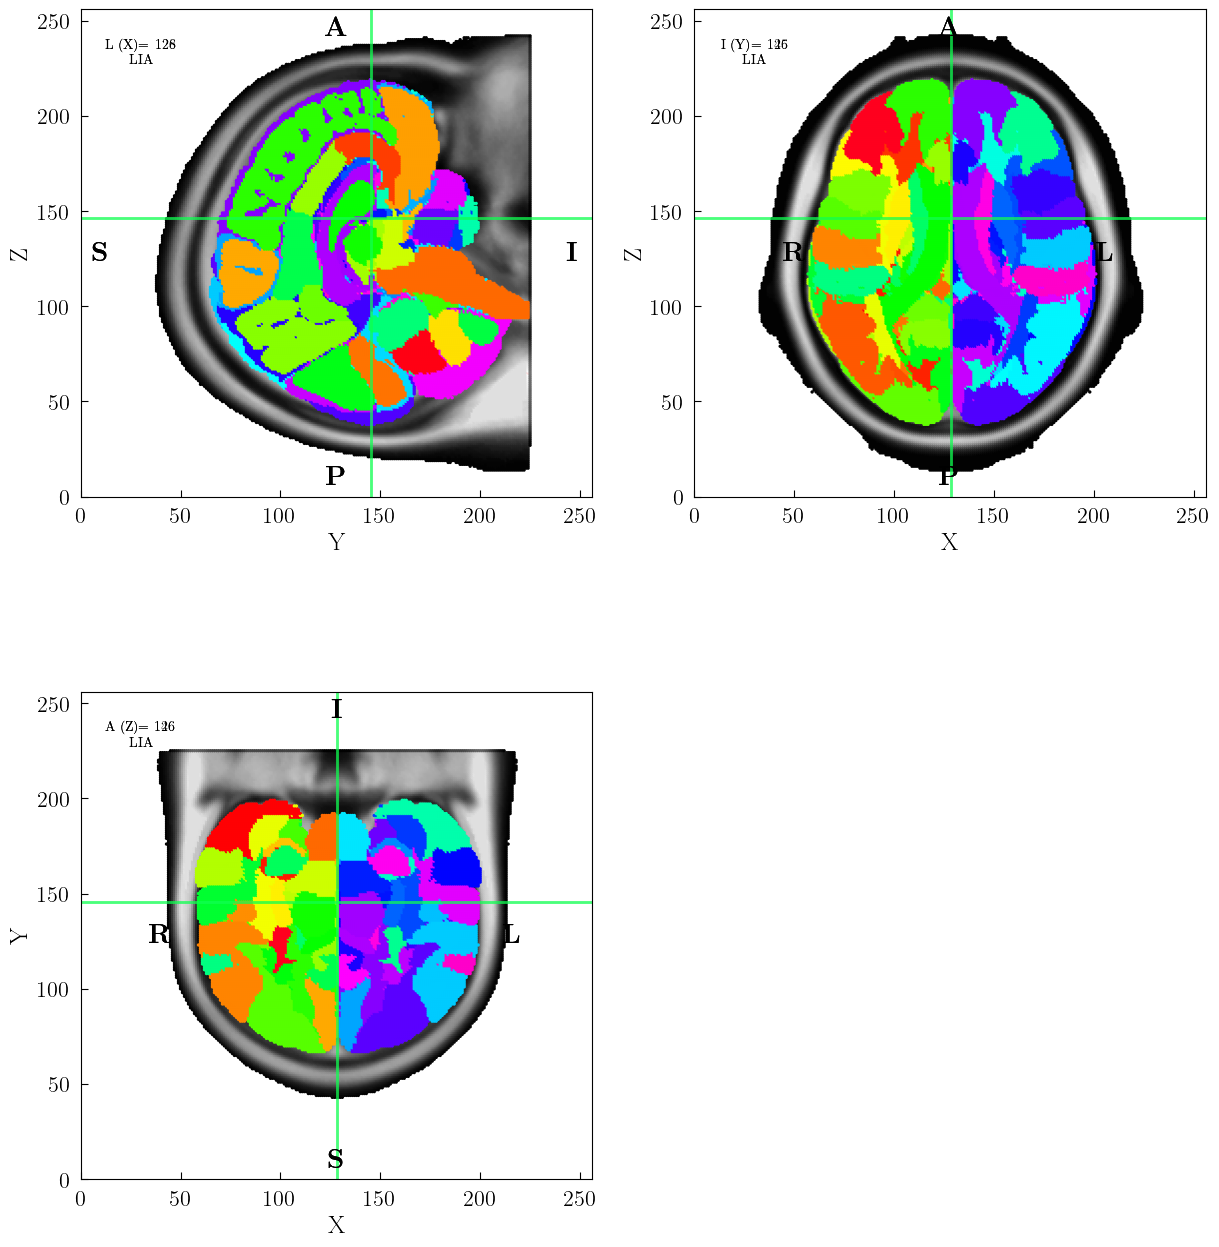

In [62]:
fig, axs = orthoview(t1mgz.get_fdata(), t1mgz.affine, cmap_name="gray", plot_affine=True, narrow_ax=False)
orthoview(cerebra_in_head_mgz.get_fdata(), cerebra_in_head_mgz.affine, narrow_ax=False,plot_affine=True,fixed_value=126,axs=axs)

In [136]:
def lia_to_ras(volume, affine=None):
    flipped_volume = np.rot90(volume, -1, axes=(1, 2))
    flipped_volume = np.flipud(flipped_volume)
    
    if affine is None:
        return flipped_volume

    flip_matrix = np.eye(4)
    flip_matrix[0, 0] = -1  # Flip X
    flip_matrix[1, 2] = -1  # Flip Z
    flip_matrix[1, 1] = 0  # Transpose Z
    flip_matrix[2, 2] = 0  # Transpose Y
    flip_matrix[2, 1] = 1  # Transpose Z

    # Adjust the translation part of the affine for the flip in X and Z axes
    flip_matrix[0, 3] = volume.shape[0] - 1
    flip_matrix[1, 3] = volume.shape[2] - 1

    # Compute the new affine matrix
    new_affine = np.dot(affine, flip_matrix)
    
    return flipped_volume, new_affine

# t1_vol_ras_old, t1_aff_ras_old = move_volume_from_lia_to_ras(t1mgz.get_fdata(),t1mgz.affine) 
t1_vol_ras, t1_aff_ras = lia_to_ras(t1mgz.get_fdata(),t1mgz.affine) 
t1_aff_ras, nib.orientations.aff2axcodes(t1_aff_ras)

(array([[   1. ,    0. ,    0. , -126.5],
        [   0. ,    1. ,    0. , -145.5],
        [   0. ,    0. ,    1. , -108.5],
        [   0. ,    0. ,    0. ,    1. ]]),
 ('R', 'A', 'S'))

In [139]:
cerebra_ras, cerebra_aff_ras = lia_to_ras(cerebra_in_head_mgz.get_fdata(),cerebra_in_head_mgz.affine) 
cerebra_aff_ras, nib.orientations.aff2axcodes(cerebra_aff_ras)

(array([[   1. ,    0. ,    0. , -126.5],
        [   0. ,    1. ,    0. , -145.5],
        [   0. ,    0. ,    1. , -108.5],
        [   0. ,    0. ,    0. ,    1. ]]),
 ('R', 'A', 'S'))

ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 108 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(0.0, 256.0)
fixed_value= 108 cerebra_volume.shape= (256, 256, 256)


(None,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

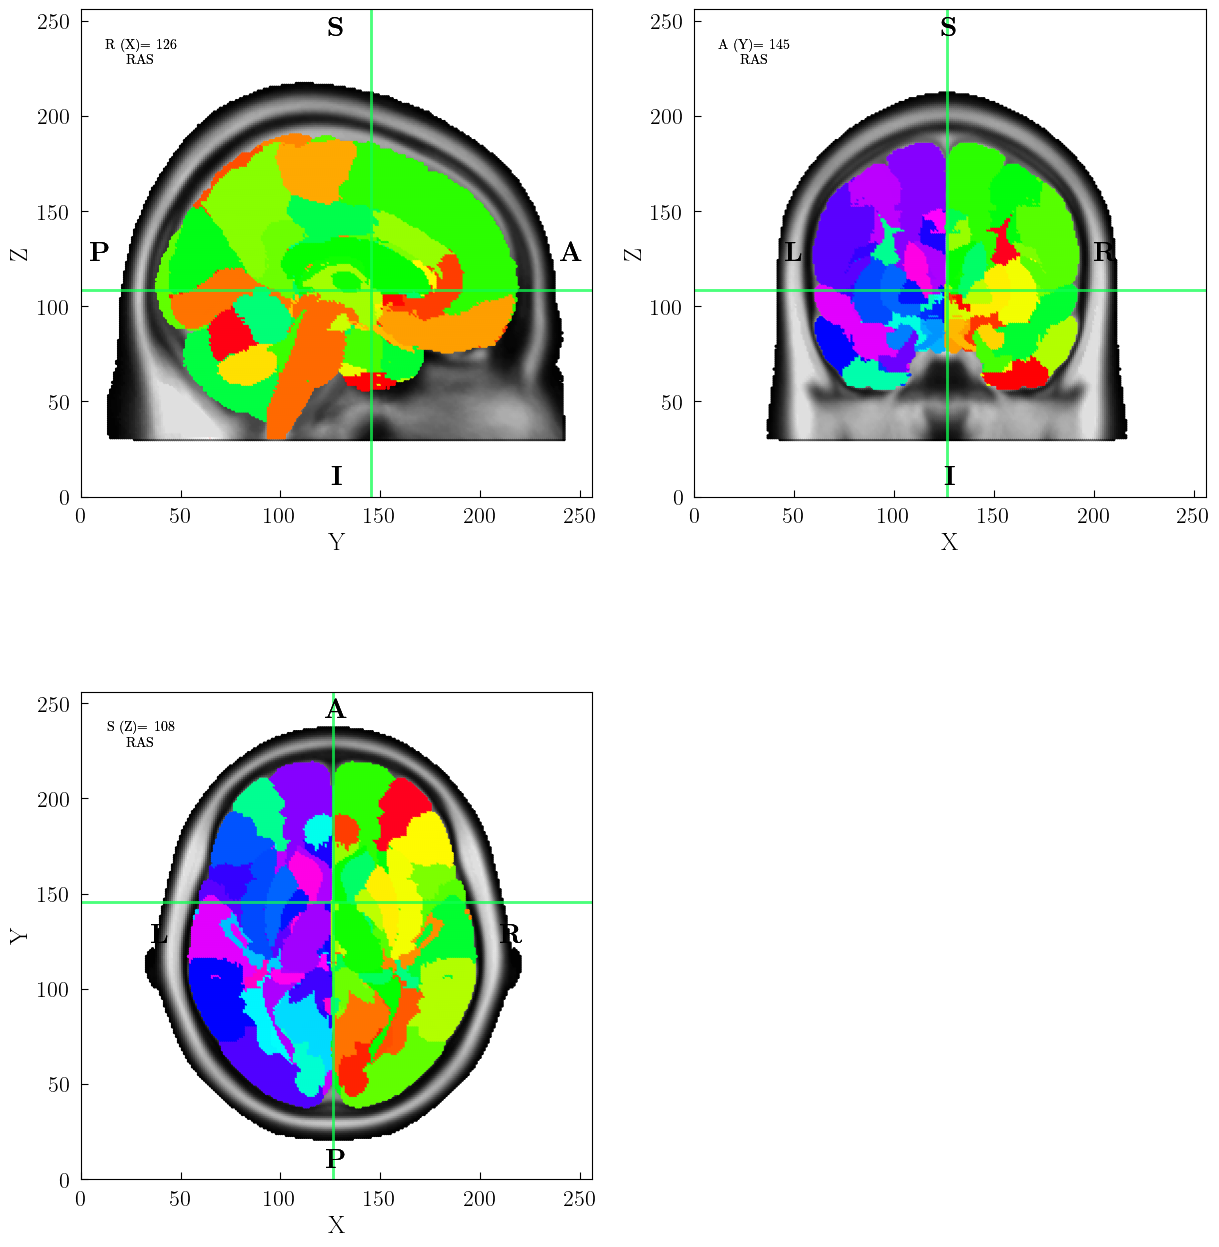

In [140]:
fig, axs = orthoview(t1_vol_ras, t1_aff_ras, narrow_ax=False,plot_affine=True)
orthoview(cerebra_ras, cerebra_aff_ras, narrow_ax=False,plot_affine=True,axs=axs)